In [284]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

cmp = 'plasma'

Enter time step: 1e-4
Enter the number of grid points: 61
Solution is expected to be stable


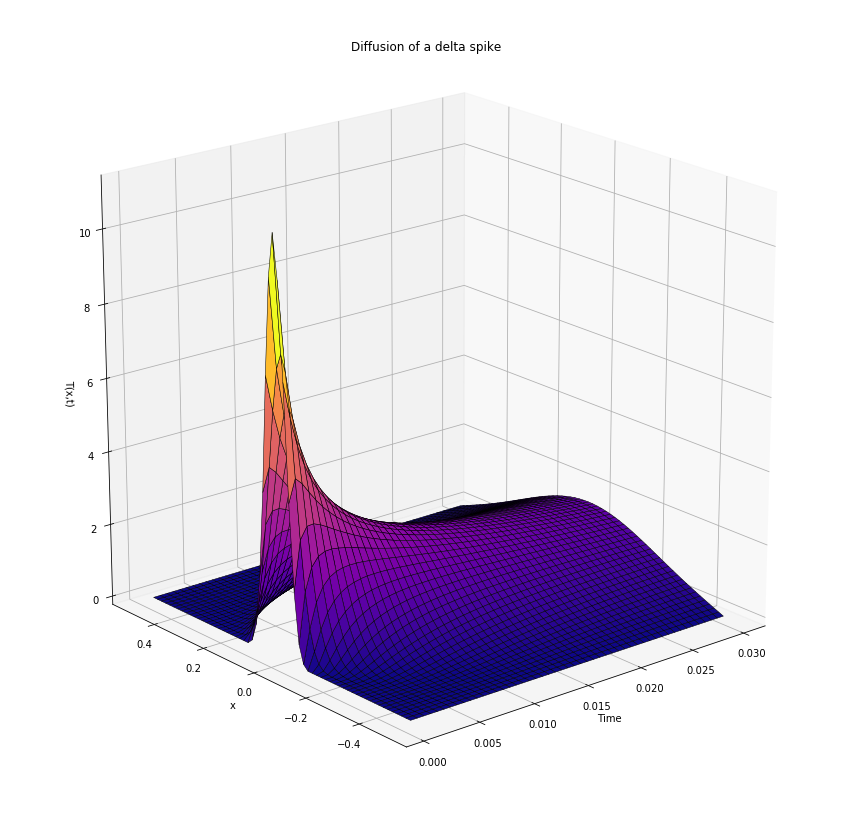

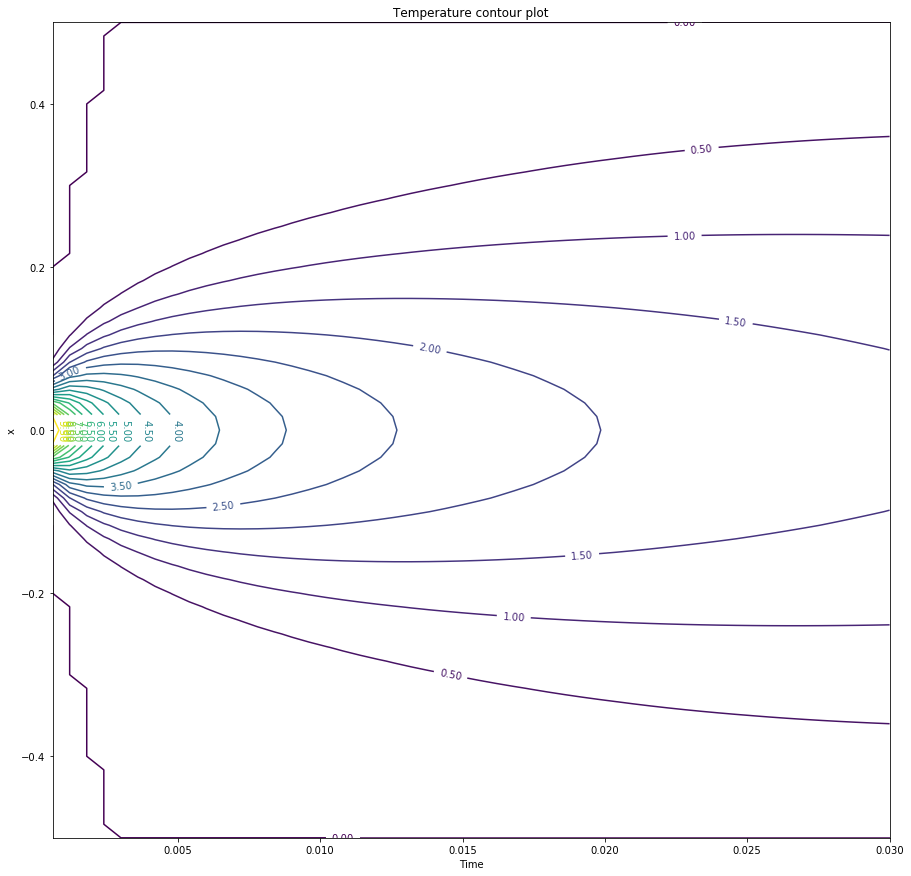

In [285]:
#* Initialize parameters (time step, grid spacing, etc.).
tau = float(input('Enter time step: '))
N = int(input('Enter the number of grid points: '))
L = 1.        # The system extends from x=-L/2 to x=L/2
h = L/(N-1)   # Grid size
kappa = 1    # Diffusion coefficient
coeff = kappa*tau/h**2
if coeff < 0.5 :
    print('Solution is expected to be stable')
else:
    print('WARNING: Solution is expected to be unstable')

#* Set initial and boundary conditions.
tt = np.zeros(N)                # Initialize temperature to zero at all points
tt[int(N/2)] = 1/h            # Initial cond. is delta function in center
## The boundary conditions are tt[0] = tt[N-1] = 0

#* Set up loop and plot variables.
xplot = np.arange(N)*h - L/2.    # Record the x scale for plots
iplot = 0                        # Counter used to count plots
nstep = 300                     # Maximum number of iterations
nplots = 50                      # Number of snapshots (plots) to take
plot_step = nstep/nplots         # Number of time steps between plots

#* Loop over the desired number of time steps.
ttplot = np.empty((N,nplots))
tplot = np.empty(nplots)
for istep in range(nstep):  ## MAIN LOOP ##
    
    #* Compute new temperature using FTCS scheme.
    tt[1:(N-1)] = (tt[1:(N-1)] + 
      coeff*(tt[2:N] + tt[0:(N-2)] - 2*tt[1:(N-1)]))
    
    #* Periodically record temperature for plotting.
    if (istep+1) % plot_step < 1 :         # Every plot_step steps
        ttplot[:,iplot] = np.copy(tt)      # record tt(i) for plotting
        tplot[iplot] = (istep+1)*tau       # Record time for plots
        iplot += 1
        
#* Plot temperature versus x and t as a wire-mesh plot

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection = '3d')
Tp, Xp = np.meshgrid(tplot, xplot)
ax.plot_surface(Tp, Xp, ttplot, rstride=1, cstride=1, cmap=cmp, edgecolor = 'black', linewidth = .5)
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel('T(x,t)')
ax.set_title('Diffusion of a delta spike\n')
ax.view_init(20, 230)
plt.show()

#* Plot temperature versus x and t as a contour plot

plt.figure(figsize=(15,15))
levels = np.linspace(0., 10., num=21) 
ct = plt.contour(tplot, xplot, ttplot, levels) 
plt.clabel(ct, fmt='%1.2f') 
plt.xlabel('Time')
plt.ylabel('x')
plt.title('Temperature contour plot')
plt.show()

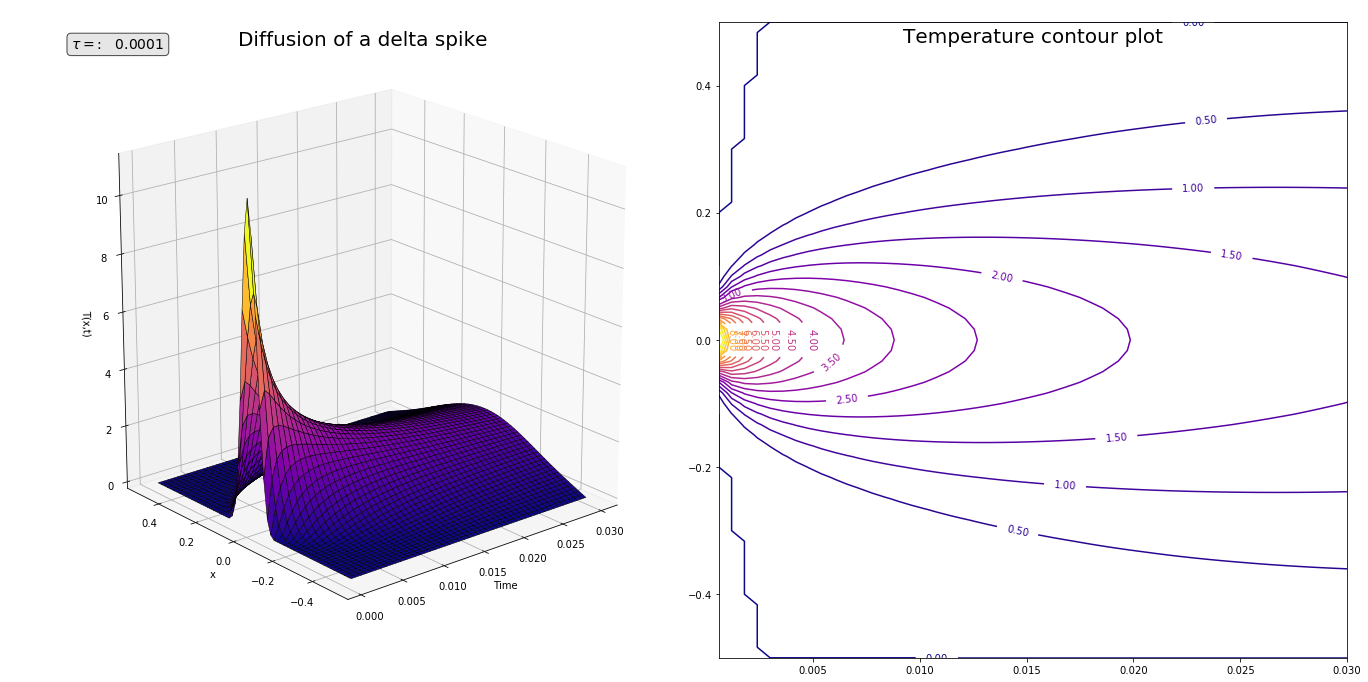

In [286]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')

Tp, Xp = np.meshgrid(tplot, xplot)
surf = ax.plot_surface(Tp, Xp, ttplot, rstride=1, cstride=1, 
                       cmap=cmp, edgecolor = 'black', linewidth = .5)
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel('T(x,t)')
ax.set_title('Diffusion of a delta spike\n', fontsize = 20)
ax.annotate('$\\tau=$:   %.6g'%(tau), xy = (.052, .928), xycoords = 'figure fraction', 
        fontsize = 14, bbox=dict(boxstyle="round", alpha = .7, fc="gainsboro"))
ax.view_init(20, 230)

ax = fig.add_subplot(1, 2, 2)
levels = np.linspace(0., 10., num=21) 
ct = plt.contour(tplot, xplot, ttplot, levels, cmap=cmp) 
plt.clabel(ct, fmt='%1.2f') 
ax.set_title('Temperature contour plot', fontsize = 20, y = .959)
plt.tight_layout()
plt.show()

# Problem 6.3

### Part 1: N = 61, $\tau$ = {1e-5, 5e-5, 1e-4, 5e-4, 1e-3}

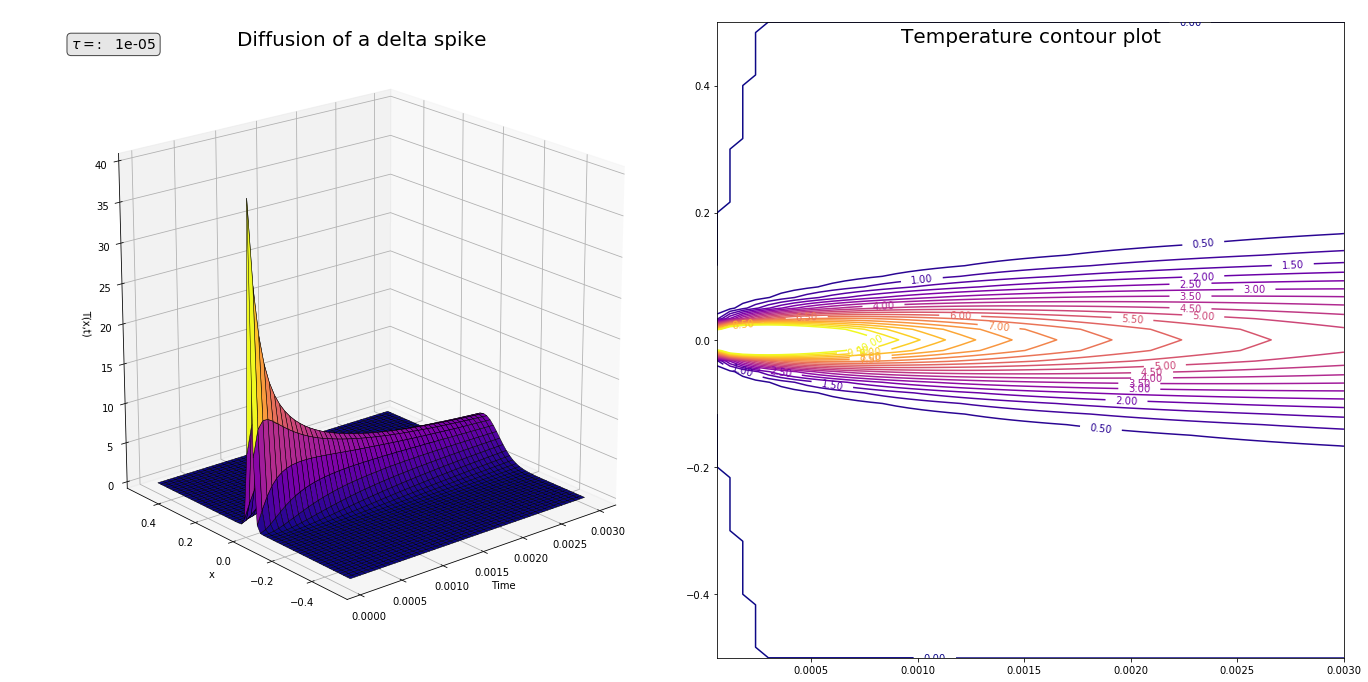

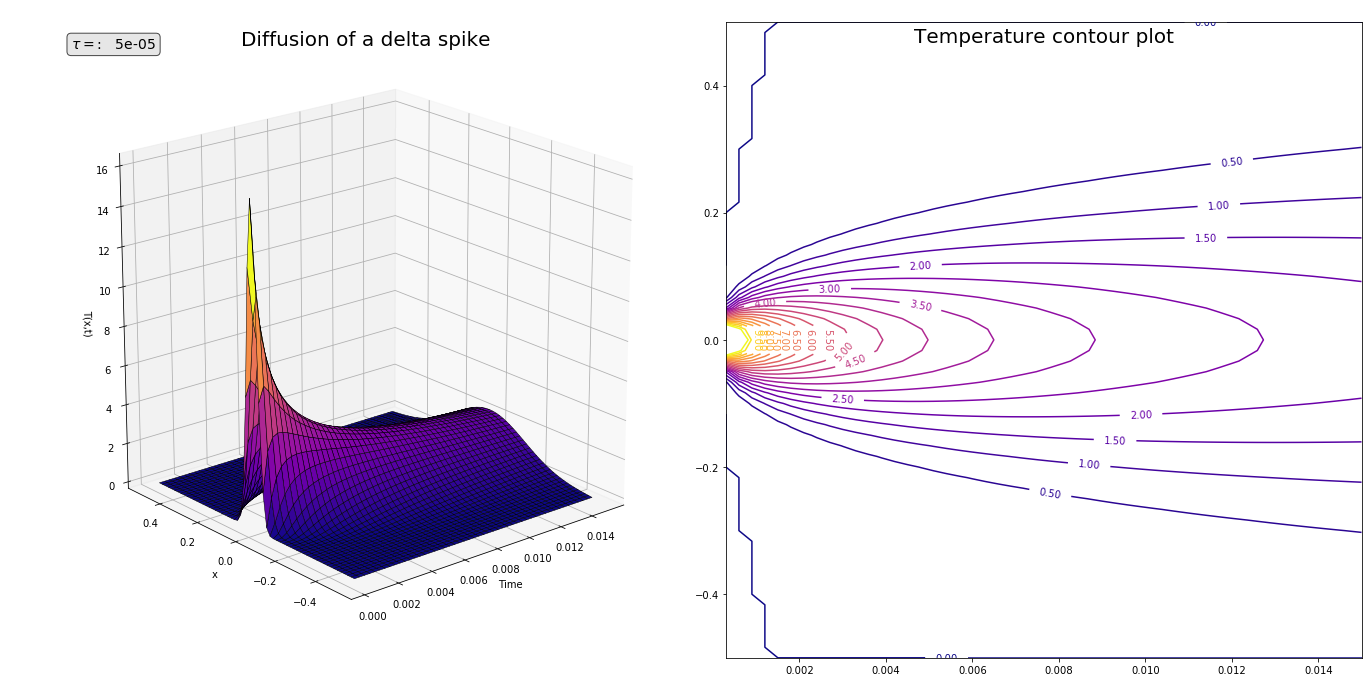

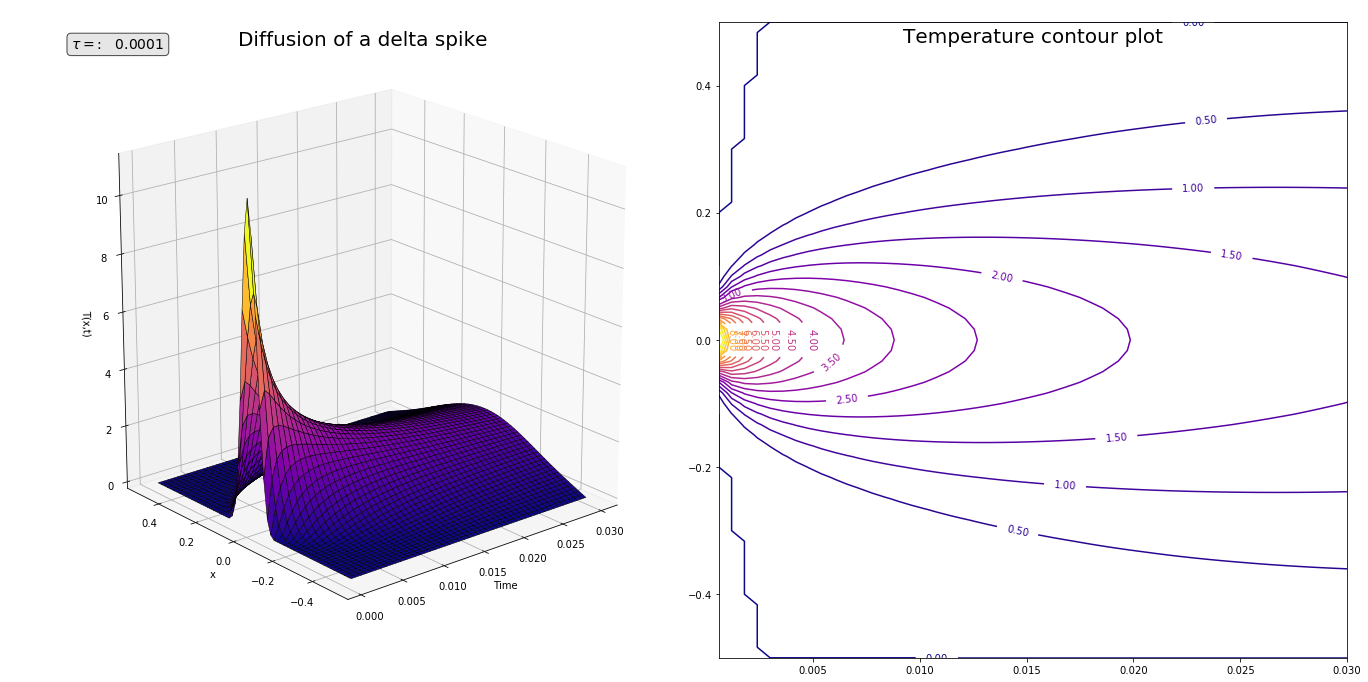

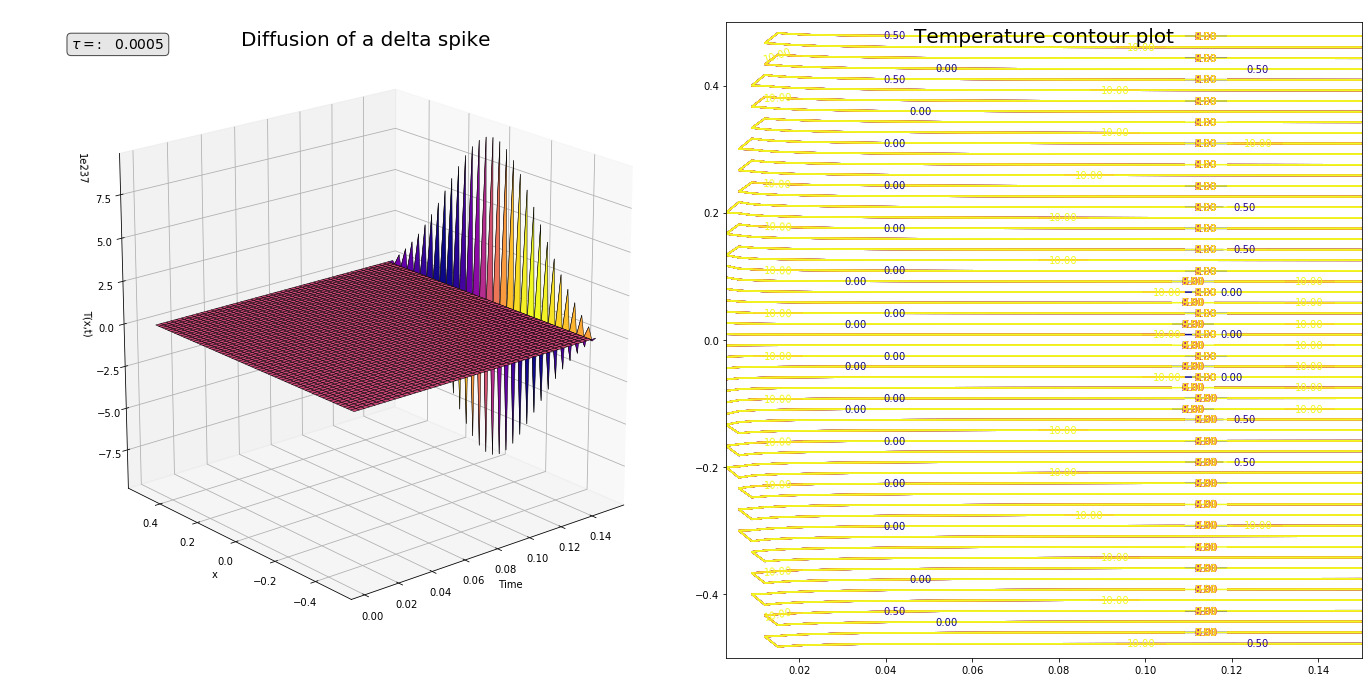

C:\Users\keega\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in add
C:\Users\keega\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in multiply
C:\Users\keega\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in subtract
C:\Users\keega\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in add
C:\Users\keega\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Z contains NaN values. This may result in rendering artifacts.


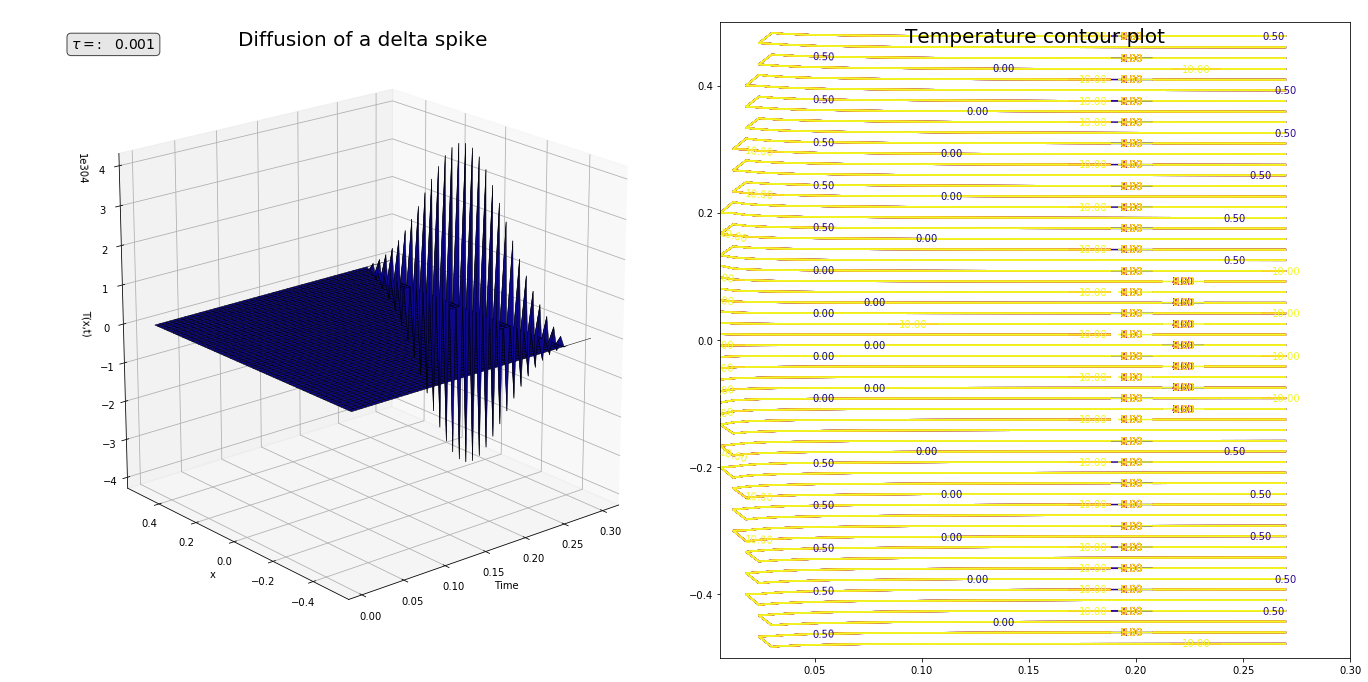

In [287]:
#* Initialize parameters (time step, grid spacing, etc.).
tau_lst = [1e-5, 5e-5, 1e-4, 5e-4, 1e-3]
N = 61
L = 1.        # The system extends from x=-L/2 to x=L/2
h = L/(N-1)   # Grid size
kappa = 1    # Diffusion coefficient

for tau in tau_lst:
    coeff = kappa*tau/h**2
    tt = np.zeros(N)                
    tt[int(N/2)] = 1/h            

    xplot = np.arange(N)*h - L/2.    
    iplot = 0                        
    nstep = 300                     
    nplots = 50                      
    plot_step = nstep/nplots         

    #* Loop over the desired number of time steps.
    ttplot = np.empty((N,nplots))
    tplot = np.empty(nplots)
    for istep in range(nstep):  ## MAIN LOOP ##

        #* Compute new temperature using FTCS scheme.
        tt[1:(N-1)] = (tt[1:(N-1)] + 
          coeff*(tt[2:N] + tt[0:(N-2)] - 2*tt[1:(N-1)]))

        #* Periodically record temperature for plotting.
        if (istep+1) % plot_step < 1 :         # Every plot_step steps
            ttplot[:,iplot] = np.copy(tt)      # record tt(i) for plotting
            tplot[iplot] = (istep+1)*tau       # Record time for plots
            iplot += 1

    #* Plot temperature versus x and t as a wire-mesh plot

    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1, 2, 1, projection='3d')

    Tp, Xp = np.meshgrid(tplot, xplot)
    surf = ax.plot_surface(Tp, Xp, ttplot, rstride=1, cstride=1, 
                           cmap=cmp, edgecolor = 'black', linewidth = .5)
    ax.set_xlabel('Time')
    ax.set_ylabel('x')
    ax.set_zlabel('T(x,t)')
    ax.set_title('Diffusion of a delta spike\n', fontsize = 20)
    ax.annotate('$\\tau=$:   %.6g'%(tau), xy = (.052, .928), xycoords = 'figure fraction', 
            fontsize = 14, bbox=dict(boxstyle="round", alpha = .7, fc="gainsboro"))
    ax.view_init(20, 230)

    ax = fig.add_subplot(1, 2, 2)
    levels = np.linspace(0., 10., num=21) 
    ct = plt.contour(tplot, xplot, ttplot, levels, cmap=cmp) 
    plt.clabel(ct, fmt='%1.2f') 
    ax.set_title('Temperature contour plot', fontsize = 20, y = .959)
    plt.tight_layout()
    plt.show()

### Part 2: $\tau$ = 1e-4, N = {25, 50, 100, 200, 300}

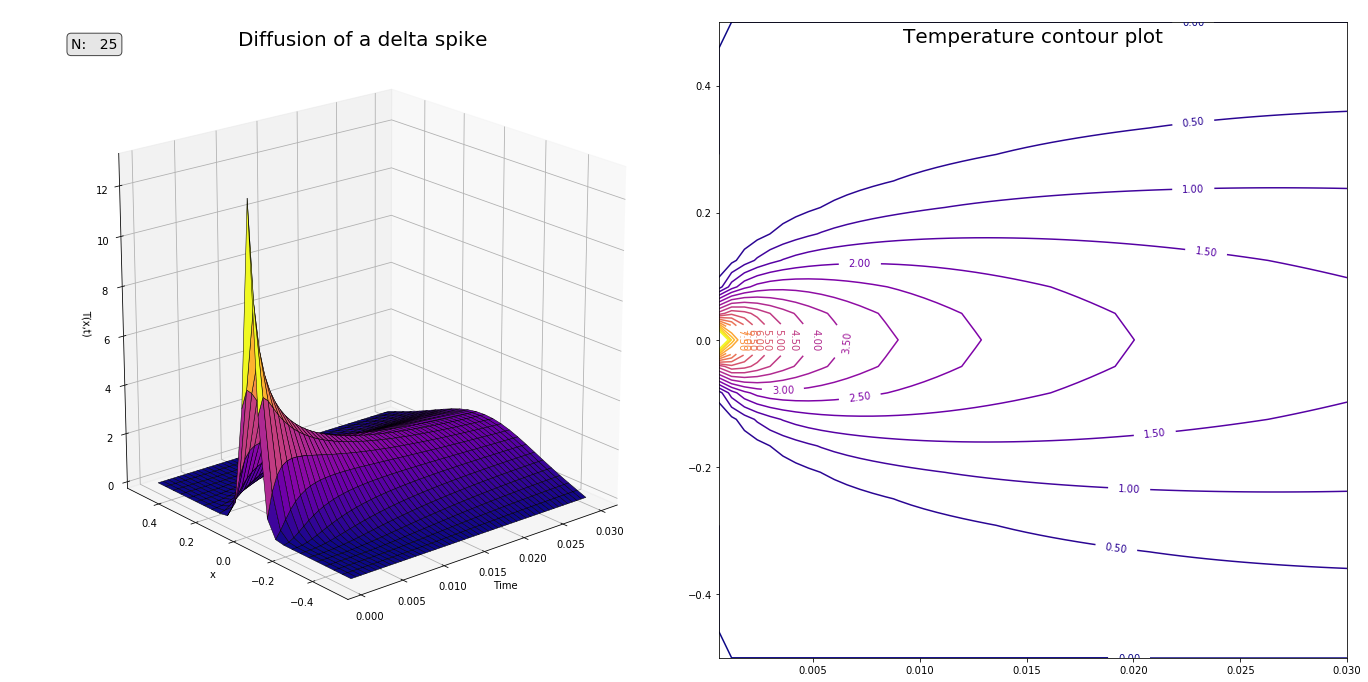

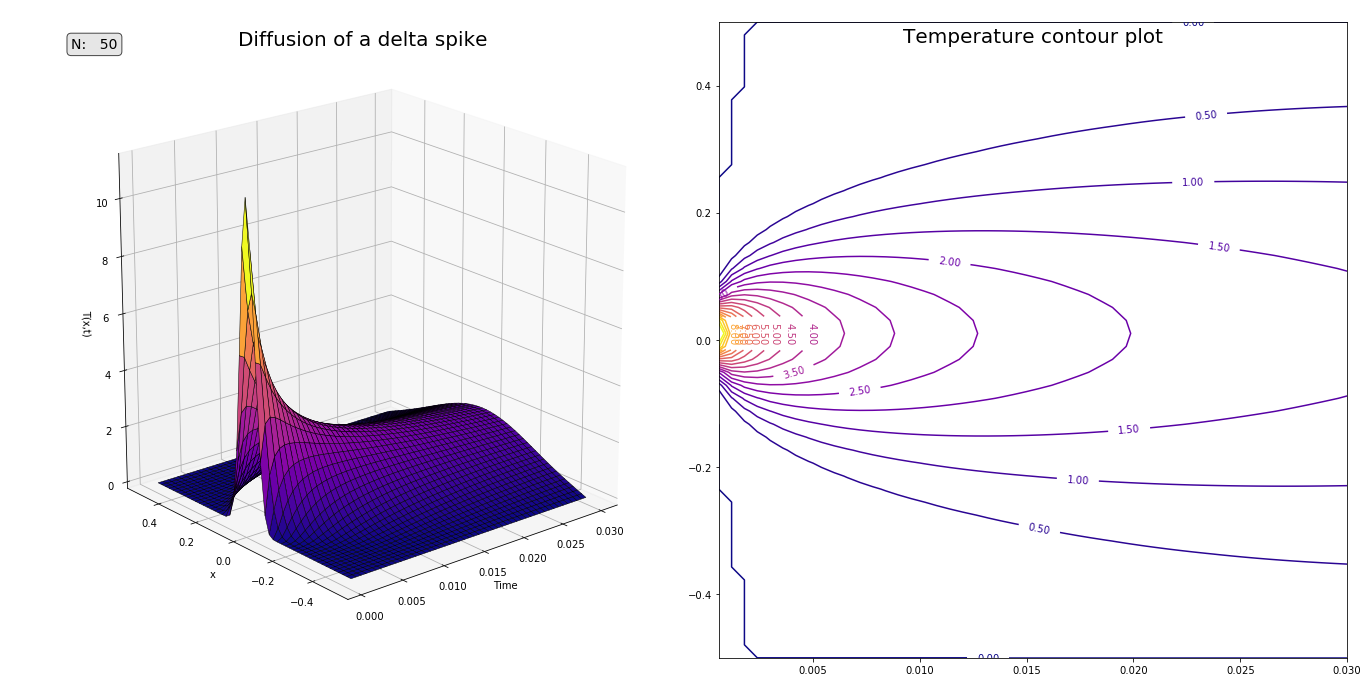

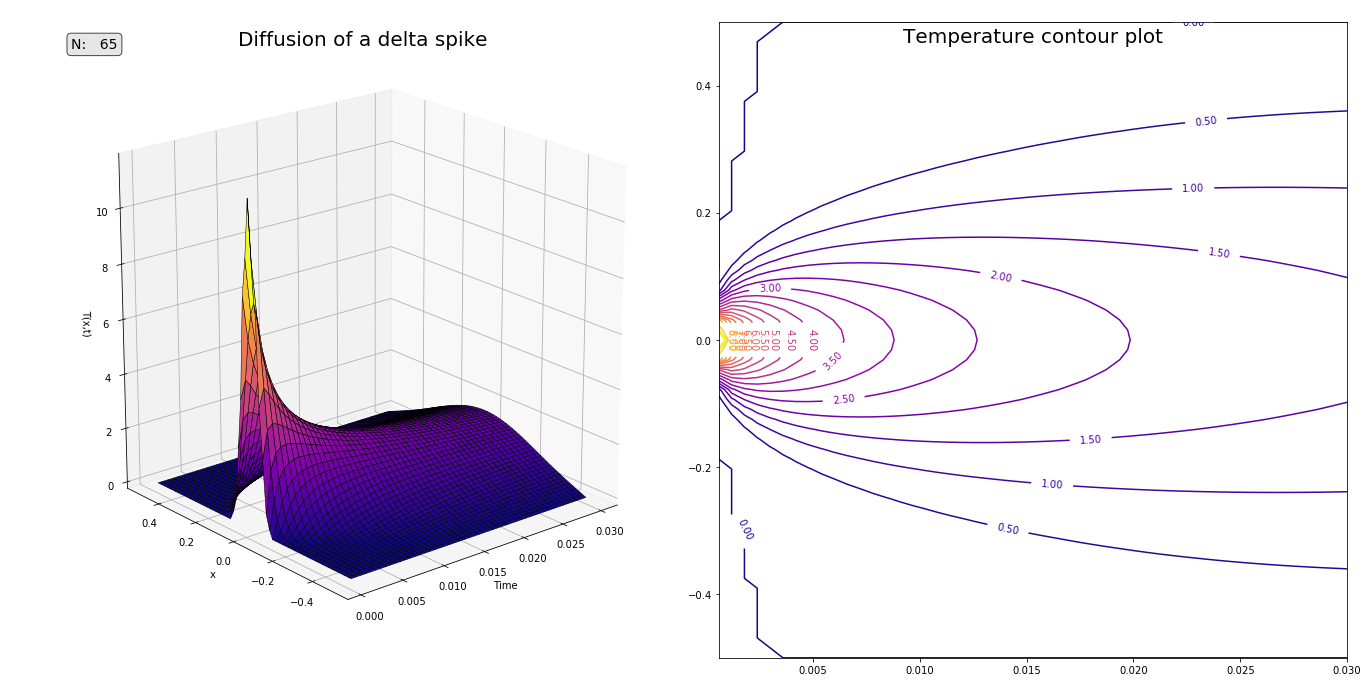

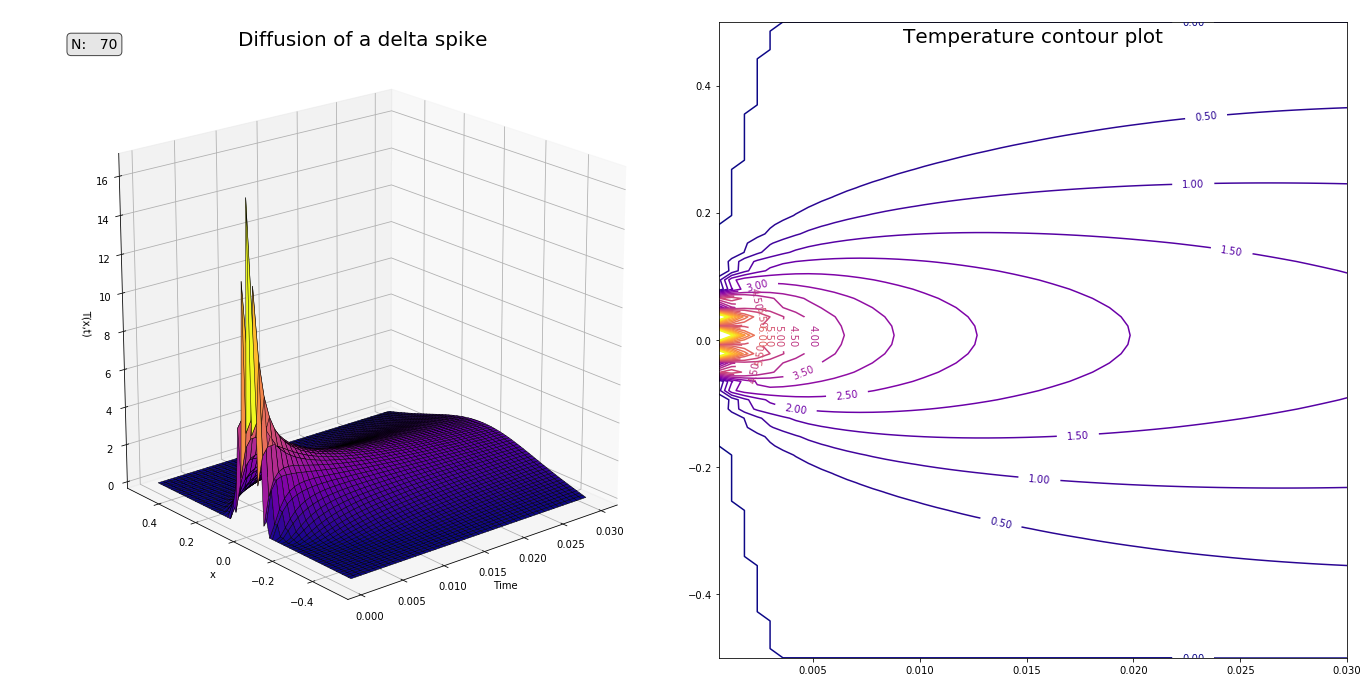

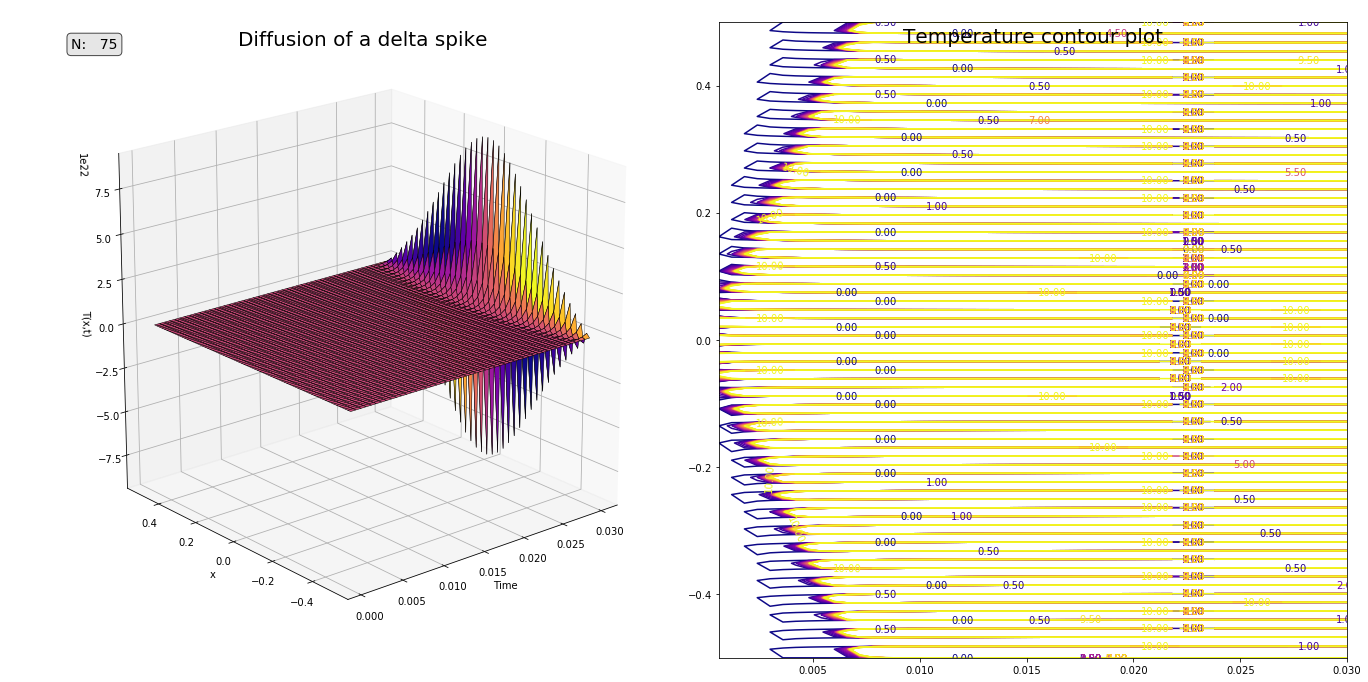

In [288]:
#* Initialize parameters (time step, grid spacing, etc.).
tau = 1e-4
N_lst = [25, 50, 65, 70, 75]
L = 1.        # The system extends from x=-L/2 to x=L/2
kappa = 1    # Diffusion coefficient

for N in N_lst:
    h = L/(N-1)
    coeff = kappa*tau/h**2
    tt = np.zeros(N)                
    tt[int(N/2)] = 1/h            

    xplot = np.arange(N)*h - L/2.    
    iplot = 0                        
    nstep = 300                     
    nplots = 50                      
    plot_step = nstep/nplots         

    #* Loop over the desired number of time steps.
    ttplot = np.empty((N,nplots))
    tplot = np.empty(nplots)
    for istep in range(nstep):  ## MAIN LOOP ##

        #* Compute new temperature using FTCS scheme.
        tt[1:(N-1)] = (tt[1:(N-1)] + 
          coeff*(tt[2:N] + tt[0:(N-2)] - 2*tt[1:(N-1)]))

        #* Periodically record temperature for plotting.
        if (istep+1) % plot_step < 1 :         # Every plot_step steps
            ttplot[:,iplot] = np.copy(tt)      # record tt(i) for plotting
            tplot[iplot] = (istep+1)*tau       # Record time for plots
            iplot += 1

    #* Plot temperature versus x and t as a wire-mesh plot

    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1, 2, 1, projection='3d')

    Tp, Xp = np.meshgrid(tplot, xplot)
    surf = ax.plot_surface(Tp, Xp, ttplot, rstride=1, cstride=1, 
                           cmap=cmp, edgecolor = 'black', linewidth = .5)
    ax.set_xlabel('Time')
    ax.set_ylabel('x')
    ax.set_zlabel('T(x,t)')
    ax.set_title('Diffusion of a delta spike\n', fontsize = 20)
    ax.annotate('N:   %.6g'%(N), xy = (.052, .928), xycoords = 'figure fraction', 
            fontsize = 14, bbox=dict(boxstyle="round", alpha = .7, fc="gainsboro"))
    ax.view_init(20, 230)

    ax = fig.add_subplot(1, 2, 2)
    levels = np.linspace(0., 10., num=21) 
    ct = plt.contour(tplot, xplot, ttplot, levels, cmap=cmp) 
    plt.clabel(ct, fmt='%1.2f') 
    ax.set_title('Temperature contour plot', fontsize = 20, y = .959)
    plt.tight_layout()
    plt.show()

# Problem 6.6

### $T(x,0) = \delta(x)$

Solution is expected to be stable


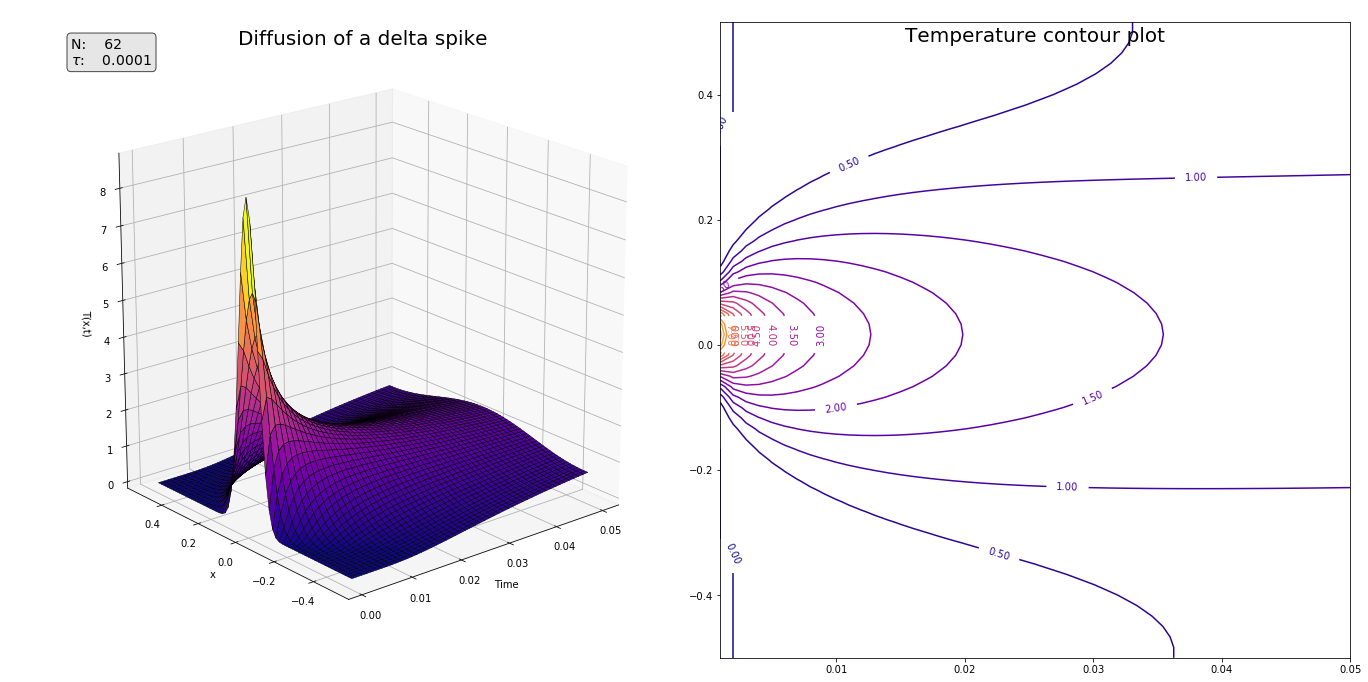

In [289]:
tau = 1e-4
N = 62
L = 1.        
h = L/(N-2)   
kappa = 1    
coeff = kappa*tau/h**2
if coeff < 0.5 :
    print('Solution is expected to be stable')
else:
    print('WARNING: Solution is expected to be unstable')

tt = np.zeros(N)                
tt[int(N/2)] = 1/h            # I.C. is delta function in center

xplot = np.arange(N)*h - L/2.    
iplot = 0                        
nstep = 500                      
nplots = 50                      
plot_step = nstep/nplots        

ttplot = np.empty((N,nplots))
tplot = np.empty(nplots)
for istep in range(nstep):  
    
    tt[1:(N-1)] = (tt[1:(N-1)] + 
      coeff*(tt[2:N] + tt[0:(N-2)] - 2*tt[1:(N-1)]))
    
    # Neumann Boundary Conditions
    tt[0] = tt[1]
    tt[-1] = tt[-2]
    
    if (istep+1) % plot_step < 1 :         
        ttplot[:,iplot] = np.copy(tt)      
        tplot[iplot] = (istep+1)*tau
        iplot += 1
        
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')

Tp, Xp = np.meshgrid(tplot, xplot)
surf = ax.plot_surface(Tp, Xp, ttplot, rstride=1, cstride=1, 
                       cmap=cmp, edgecolor = 'black', linewidth = .5)
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel('T(x,t)')
ax.set_title('Diffusion of a delta spike\n', fontsize = 20)
ax.annotate('N:    %.6g\n$\\tau$:    %.6g'%(N, tau), xy = (.052, .905), xycoords = 'figure fraction', 
        fontsize = 14, bbox=dict(boxstyle="round", alpha = .7, fc="gainsboro"))
ax.view_init(20, 230)

ax = fig.add_subplot(1, 2, 2)
levels = np.linspace(0., 10., num=21) 
ct = plt.contour(tplot, xplot, ttplot, levels, cmap=cmp) 
plt.clabel(ct, fmt='%1.2f') 
ax.set_title('Temperature contour plot', fontsize = 20, y = .959)
plt.tight_layout()
plt.show()

### $T(x,0) = \delta(x-L/4)$

Solution is expected to be stable


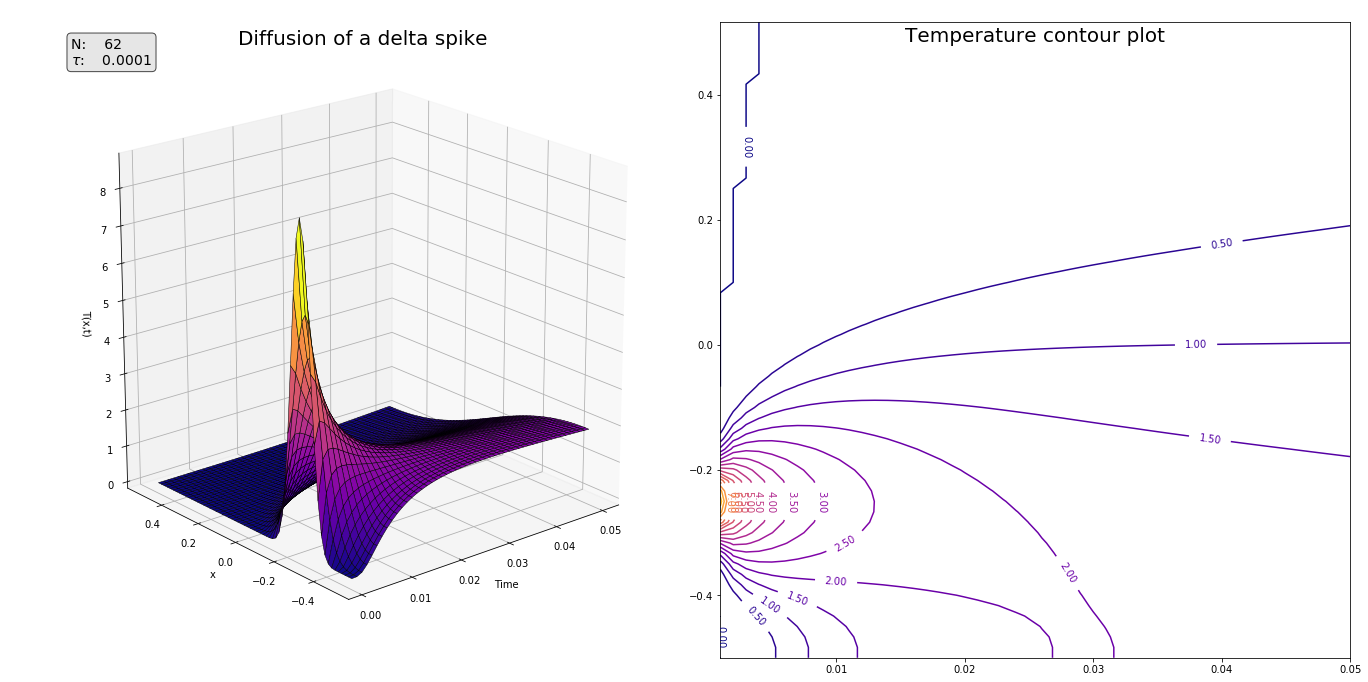

In [290]:
tau = 1e-4
N = 62
L = 1.        
h = L/(N-2)   
kappa = 1    
coeff = kappa*tau/h**2
if coeff < 0.5 :
    print('Solution is expected to be stable')
else:
    print('WARNING: Solution is expected to be unstable')

tt = np.zeros(N)                
tt[int(N/4)] = 1/h            # I.C. is delta function offset

xplot = np.arange(N)*h - L/2.    
iplot = 0                        
nstep = 500                      
nplots = 50                      
plot_step = nstep/nplots        

ttplot = np.empty((N,nplots))
tplot = np.empty(nplots)
for istep in range(nstep):  
    
    tt[1:(N-1)] = (tt[1:(N-1)] + 
      coeff*(tt[2:N] + tt[0:(N-2)] - 2*tt[1:(N-1)]))
    
    # Neumann Boundary Conditions
    tt[0] = tt[1]
    tt[-1] = tt[-2]
    
    if (istep+1) % plot_step < 1 :        
        ttplot[:,iplot] = np.copy(tt)      
        tplot[iplot] = (istep+1)*tau      
        iplot += 1
        
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')

Tp, Xp = np.meshgrid(tplot, xplot)
surf = ax.plot_surface(Tp, Xp, ttplot, rstride=1, cstride=1, 
                       cmap=cmp, edgecolor = 'black', linewidth = .5)
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel('T(x,t)')
ax.set_title('Diffusion of a delta spike\n', fontsize = 20)
ax.annotate('N:    %.6g\n$\\tau$:    %.6g'%(N, tau), xy = (.052, .905), xycoords = 'figure fraction', 
        fontsize = 14, bbox=dict(boxstyle="round", alpha = .7, fc="gainsboro"))
ax.view_init(20, 230)

ax = fig.add_subplot(1, 2, 2)
levels = np.linspace(0., 10., num=21) 
ct = plt.contour(tplot, xplot, ttplot, levels, cmap=cmp) 
plt.clabel(ct, fmt='%1.2f') 
ax.set_title('Temperature contour plot', fontsize = 20, y = .959)
plt.tight_layout()
plt.show()

# Problem 6.7

### $T(x,0) = \delta(x)$

Solution is expected to be stable


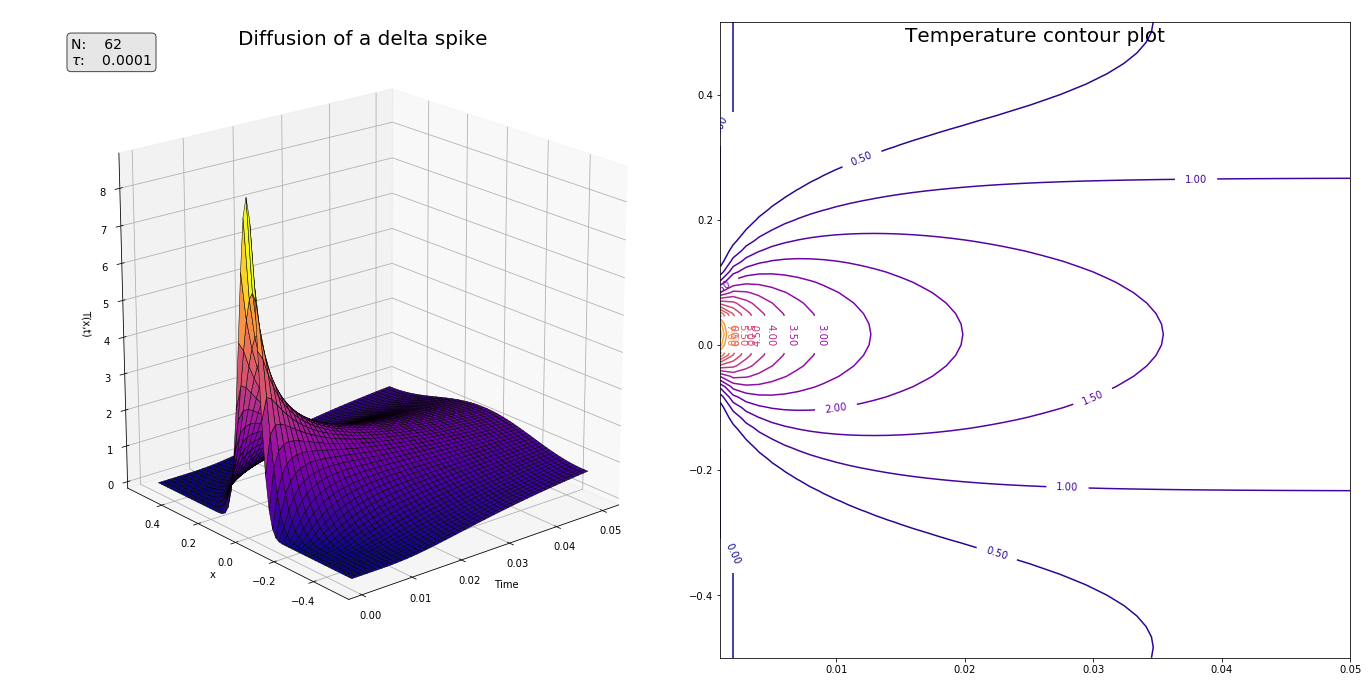

In [291]:
tau = 1e-4
N = 62
L = 1.        
h = L/(N-2)   
kappa = 1    
coeff = kappa*tau/h**2
if coeff < 0.5 :
    print('Solution is expected to be stable')
else:
    print('WARNING: Solution is expected to be unstable')

tt = np.zeros(N)                
tt[int(N/2)] = 1/h            # I.C. is delta function in center

xplot = np.arange(N)*h - L/2.    
iplot = 0                        
nstep = 500                      
nplots = 50                      
plot_step = nstep/nplots        

ttplot = np.empty((N,nplots))
tplot = np.empty(nplots)
for istep in range(nstep):  
    
    tt[1:(N-1)] = (tt[1:(N-1)] + 
      coeff*(tt[2:N] + tt[0:(N-2)] - 2*tt[1:(N-1)]))
    
    # Periodic Boundary Conditions
    tt[0] = tt[-2]
    tt[-1] = tt[1]
    
    if (istep+1) % plot_step < 1 :         
        ttplot[:,iplot] = np.copy(tt)      
        tplot[iplot] = (istep+1)*tau
        iplot += 1
        
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')

Tp, Xp = np.meshgrid(tplot, xplot)
surf = ax.plot_surface(Tp, Xp, ttplot, rstride=1, cstride=1, 
                       cmap=cmp, edgecolor = 'black', linewidth = .5)
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel('T(x,t)')
ax.set_title('Diffusion of a delta spike\n', fontsize = 20)
ax.annotate('N:    %.6g\n$\\tau$:    %.6g'%(N, tau), xy = (.052, .905), xycoords = 'figure fraction', 
        fontsize = 14, bbox=dict(boxstyle="round", alpha = .7, fc="gainsboro"))
ax.view_init(20, 230)

ax = fig.add_subplot(1, 2, 2)
levels = np.linspace(0., 10., num=21) 
ct = plt.contour(tplot, xplot, ttplot, levels, cmap=cmp) 
plt.clabel(ct, fmt='%1.2f') 
ax.set_title('Temperature contour plot', fontsize = 20, y = .959)
plt.tight_layout()
plt.show()

### $T(x,0) = \delta(x-L/4)$

Solution is expected to be stable


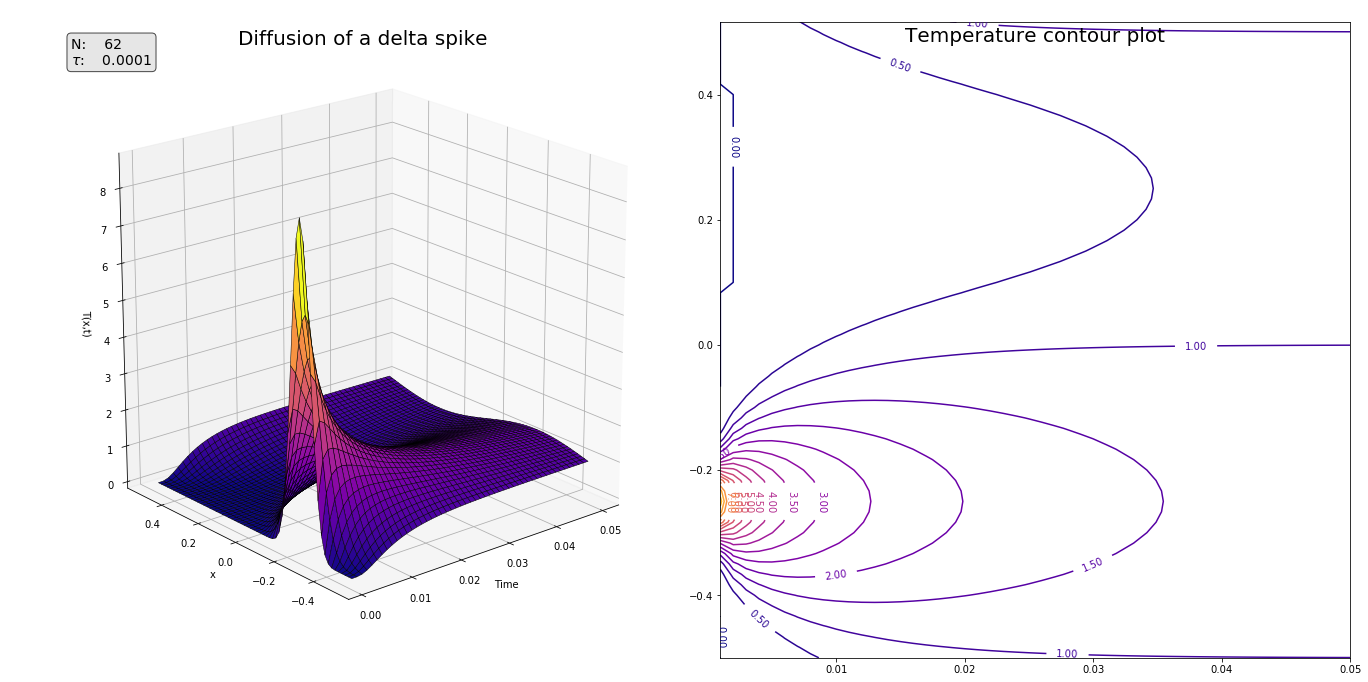

In [295]:
tau = 1e-4
N = 62
L = 1.        
h = L/(N-2)   
kappa = 1    
coeff = kappa*tau/h**2
if coeff < 0.5 :
    print('Solution is expected to be stable')
else:
    print('WARNING: Solution is expected to be unstable')

tt = np.zeros(N)                
tt[int(N/4)] = 1/h            # I.C. is delta function offset

xplot = np.arange(N)*h - L/2.    
iplot = 0                        
nstep = 500                      
nplots = 50                      
plot_step = nstep/nplots        

ttplot = np.empty((N,nplots))
tplot = np.empty(nplots)
for istep in range(nstep):  
    
    tt[1:(N-1)] = (tt[1:(N-1)] + 
      coeff*(tt[2:N] + tt[0:(N-2)] - 2*tt[1:(N-1)]))
    
    # Periodic Boundary Conditions
    tt[0] = tt[-2]
    tt[-1] = tt[1]
    
    if (istep+1) % plot_step < 1 :         
        ttplot[:,iplot] = np.copy(tt)      
        tplot[iplot] = (istep+1)*tau
        iplot += 1
        
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')

Tp, Xp = np.meshgrid(tplot, xplot)
surf = ax.plot_surface(Tp, Xp, ttplot, rstride=1, cstride=1, 
                       cmap=cmp, edgecolor = 'black', linewidth = .5)
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel('T(x,t)')
ax.set_title('Diffusion of a delta spike\n', fontsize = 20)
ax.annotate('N:    %.6g\n$\\tau$:    %.6g'%(N, tau), xy = (.052, .905), xycoords = 'figure fraction', 
        fontsize = 14, bbox=dict(boxstyle="round", alpha = .7, fc="gainsboro"))
ax.view_init(20, 230)

ax = fig.add_subplot(1, 2, 2)
levels = np.linspace(0., 10., num=21) 
ct = plt.contour(tplot, xplot, ttplot, levels, cmap=cmp) 
plt.clabel(ct, fmt='%1.2f') 
ax.set_title('Temperature contour plot', fontsize = 20, y = .959)
plt.tight_layout()
plt.show()

# Problem 6.9

### DuFort-Frankel scheme

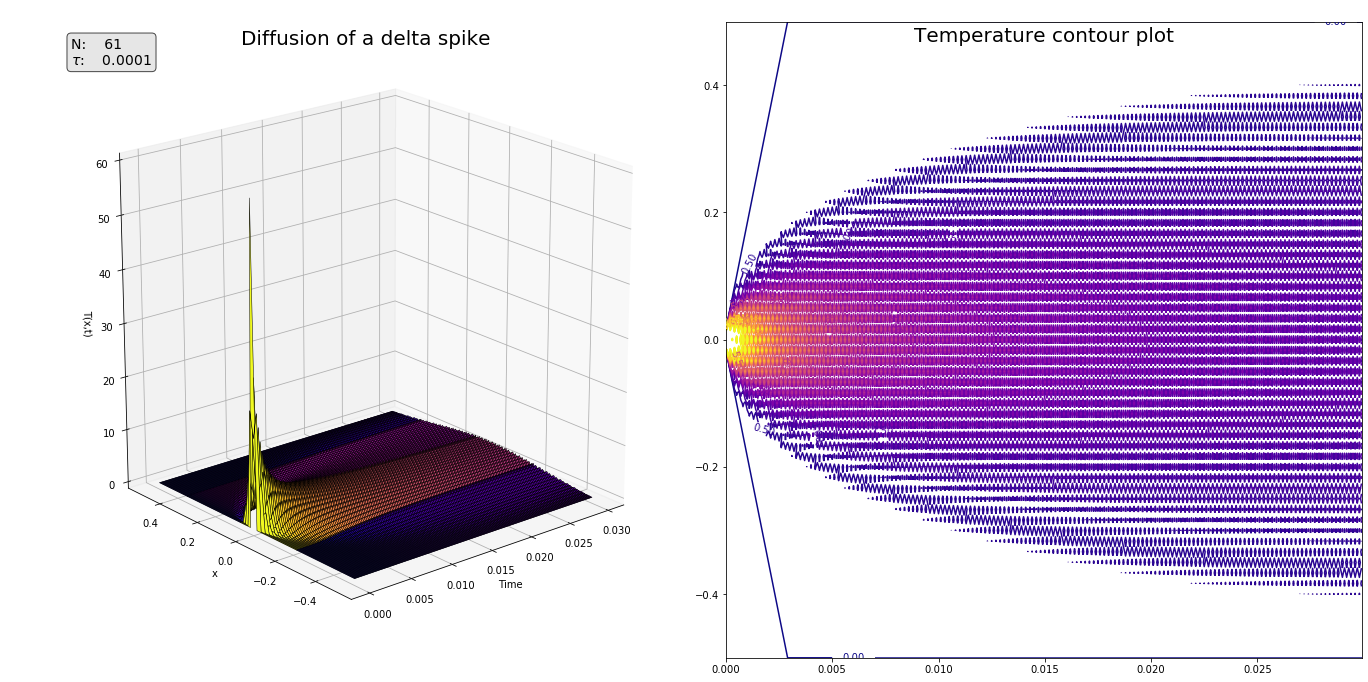

In [296]:
tau = 1e-4
N = 61
L = 1.        
h = L/(N-1)   
kappa = 1   
coeff = kappa*tau/h**2
nstep = 300
tt = np.zeros((N,nstep))
tplot = np.zeros(nstep)
xplot = np.arange(N)*h - L/2. 

tt[int(N/2),0] = 1/h

istep = 1
tt[1:(N-1),istep] = (tt[1:(N-1),istep - 1] +
                     coeff*(tt[2:N,istep - 1] + tt[0:(N-2),istep - 1] - 2*tt[1:(N-1),istep - 1]))
tplot[istep] = istep*tau

tplot[1] = tau
for i in range(nstep-2):
    istep = i + 2
    tt[1:(N-1),istep] = ((1-2*coeff)/(1+2*coeff) * tt[1:(N-1),istep-2] + (2*coeff)/(1+2*coeff) *
                         (tt[2:N,istep-1] + tt[0:(N-2),istep-1]))
    tplot[istep] = (istep)*tau      

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')

Tp, Xp = np.meshgrid(tplot, xplot)
surf = ax.plot_surface(Tp, Xp, tt, rstride=17, cstride=1, 
                       cmap=cmp, edgecolor = 'black', linewidth = .5)
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel('T(x,t)')
ax.set_title('Diffusion of a delta spike\n', fontsize = 20)
ax.annotate('N:    %.6g\n$\\tau$:    %.6g'%(N, tau), xy = (.052, .905), xycoords = 'figure fraction', 
        fontsize = 14, bbox=dict(boxstyle="round", alpha = .7, fc="gainsboro"))
ax.view_init(20, 230)

ax = fig.add_subplot(1, 2, 2)
levels = np.linspace(0., 10., num=21) 
ct = plt.contour(tplot, xplot, tt, levels, cmap=cmp) 
plt.clabel(ct, fmt='%1.2f') 
ax.set_title('Temperature contour plot', fontsize = 20, y = .959)
plt.tight_layout()
plt.show()

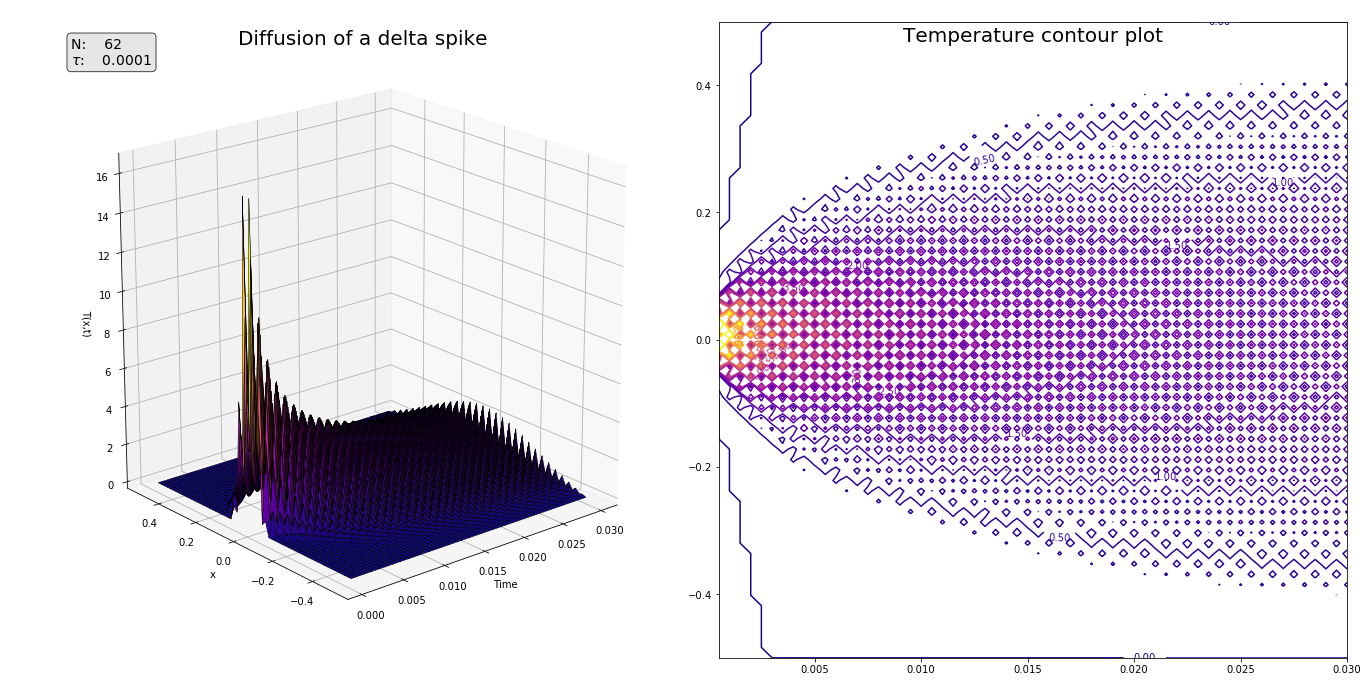

In [297]:
tau = 1e-4
N = 62
L = 1.        
h = L/(N-1)   
kappa = 1   
coeff = kappa*tau/h**2

xplot = np.arange(N)*h - L/2.   
iplot = 0                     
nstep = 300                  
nplots = 60      
plot_step = nstep/nplots       

ttplot = np.empty((N,nplots))
tplot = np.empty(nplots)

tt = np.zeros((N,3))              
tt[int(N/2),0] = 1/h            
tt[1:(N-1),1] = (tt[1:(N-1),0] +
                         coeff*(tt[2:N,0] + tt[0:(N-2),0] - 2*tt[1:(N-1),0]))

for i in range(nstep-1):
    istep = i + 1    
    tt[1:(N-1),2] = ((1-2*coeff)/(1+2*coeff) * tt[1:(N-1),0] + (2*coeff)/(1+2*coeff) * 
                     (tt[2:N,1] + tt[0:(N-2),1]))

    tt[:,0] = tt[:,1]
    tt[:,1] = tt[:,2]
    
    if (istep+1) % plot_step < 1:         
        ttplot[:,iplot] = np.copy(tt[:,2])      
        tplot[iplot] = (istep+1)*tau      
        iplot += 1
        
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')

Tp, Xp = np.meshgrid(tplot, xplot)
surf = ax.plot_surface(Tp, Xp, ttplot, rstride=1, cstride=1, 
                       cmap=cmp, edgecolor = 'black', linewidth = .5)
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel('T(x,t)')
ax.set_title('Diffusion of a delta spike\n', fontsize = 20)
ax.annotate('N:    %.6g\n$\\tau$:    %.6g'%(N, tau), xy = (.052, .905), xycoords = 'figure fraction', 
        fontsize = 14, bbox=dict(boxstyle="round", alpha = .7, fc="gainsboro"))
ax.view_init(20, 230)

ax = fig.add_subplot(1, 2, 2)
levels = np.linspace(0., 10., num=21) 
ct = plt.contour(tplot, xplot, ttplot, levels, cmap=cmp) 
plt.clabel(ct, fmt='%1.2f') 
ax.set_title('Temperature contour plot', fontsize = 20, y = .959)
plt.tight_layout()
plt.show()

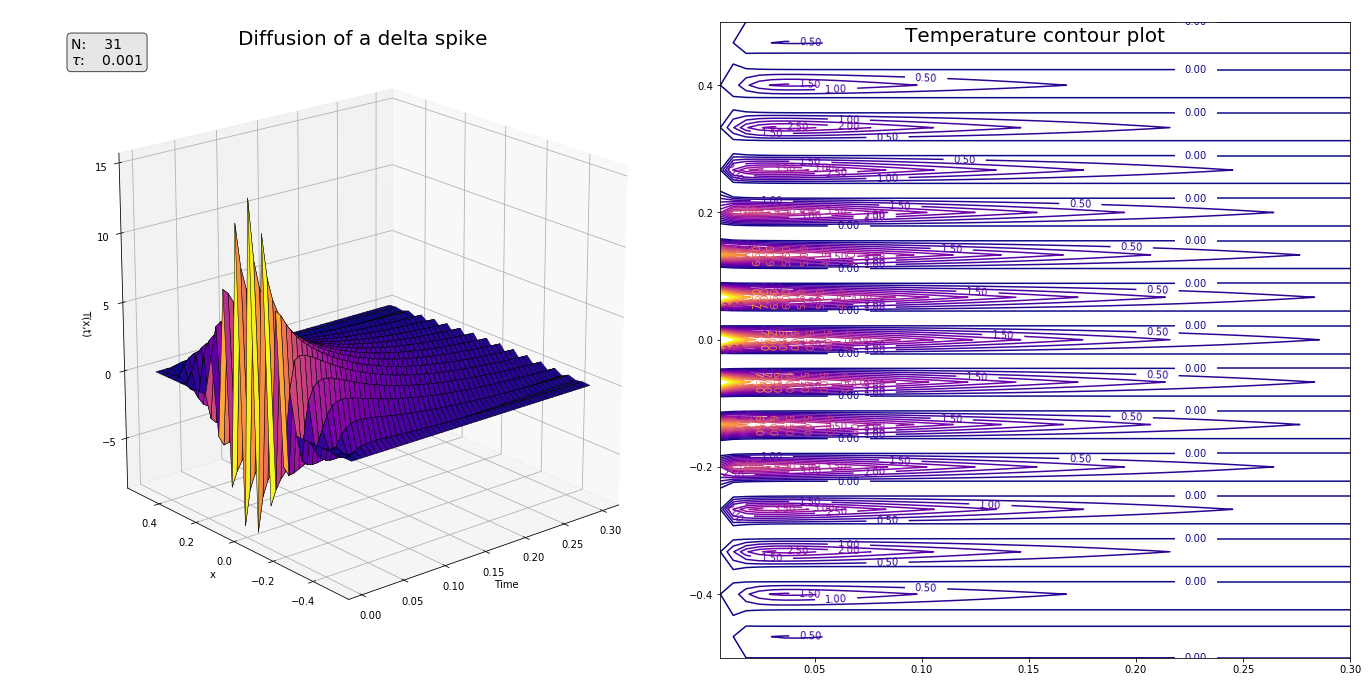

In [298]:
tau = 1e-3
N = 31
L = 1.        
h = L/(N-1)   
kappa = 1   
coeff = kappa*tau/h**2

tt = np.zeros((N,3))              
tt[int(N/2),0] = 1/h            

xplot = np.arange(N)*h - L/2.   
iplot = 0                     
nstep = 300                  
nplots = 50      
plot_step = nstep/nplots       

ttplot = np.zeros((N,nplots))
tplot = np.zeros(nplots)

tt[1:(N-1),1] = (tt[1:(N-1),0] +
                         coeff*(tt[2:N,0] + tt[0:(N-2),0] - 2*tt[1:(N-1),0]))

for i in range(nstep-1):
    istep = i + 1

    tt[1:(N-1),2] = ((1-2*coeff)/(1+2*coeff) * tt[1:(N-1),0] + (2*coeff)/(1+2*coeff) * 
                     (tt[2:N,1] + tt[0:(N-2),1]))

    tt[:,0] = tt[:,1]
    tt[:,1] = tt[:,2]
    
    if (istep+1) % plot_step < 1:
        ttplot[:,iplot] = np.copy(tt[:,1])      
        tplot[iplot] = (istep+1)*tau      
        iplot += 1
        
    
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')

Tp, Xp = np.meshgrid(tplot, xplot)
surf = ax.plot_surface(Tp, Xp, ttplot, rstride=1, cstride=1, 
                       cmap=cmp, edgecolor = 'black', linewidth = .5)
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel('T(x,t)')
ax.set_title('Diffusion of a delta spike\n', fontsize = 20)
ax.annotate('N:    %.6g\n$\\tau$:    %.6g'%(N, tau), xy = (.052, .905), xycoords = 'figure fraction', 
        fontsize = 14, bbox=dict(boxstyle="round", alpha = .7, fc="gainsboro"))
ax.view_init(20, 230)

ax = fig.add_subplot(1, 2, 2)
levels = np.linspace(0., 10., num=21) 
ct = plt.contour(tplot, xplot, ttplot, levels, cmap=cmp) 
plt.clabel(ct, fmt='%1.2f') 
ax.set_title('Temperature contour plot', fontsize = 20, y = .959)
plt.tight_layout()
plt.show()

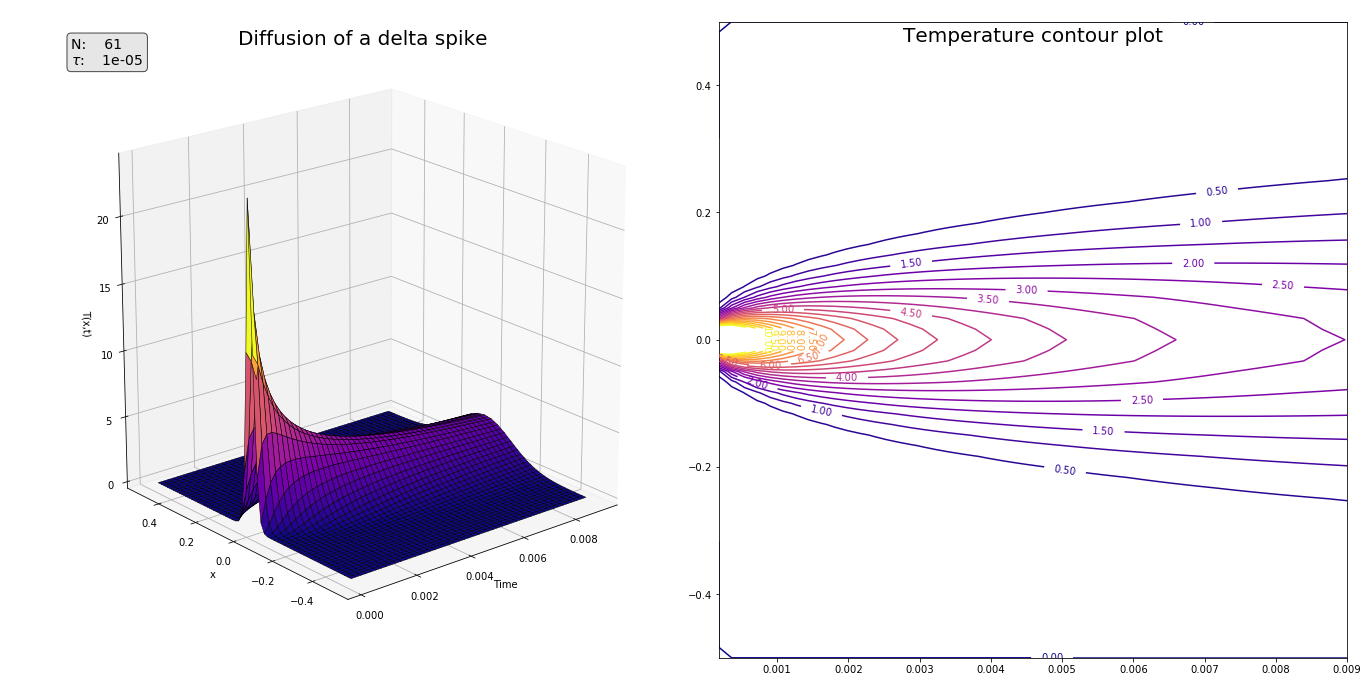

In [299]:
tau = 1e-5
N = 61
L = 1.        
h = L/(N-1)   
kappa = 1   
coeff = kappa*tau/h**2

tt = np.zeros((N,3))              
tt[int(N/2),0] = 1/h            

xplot = np.arange(N)*h - L/2.   
iplot = 0                     
nstep = 900                  
nplots = 50      
plot_step = nstep/nplots       

ttplot = np.zeros((N,nplots))
tplot = np.zeros(nplots)

tt[1:(N-1),1] = (tt[1:(N-1),0] +
                         coeff*(tt[2:N,0] + tt[0:(N-2),0] - 2*tt[1:(N-1),0]))

for i in range(nstep-1):
    istep = i + 1

    tt[1:(N-1),2] = ((1-2*coeff)/(1+2*coeff) * tt[1:(N-1),0] + (2*coeff)/(1+2*coeff) * 
                     (tt[2:N,1] + tt[0:(N-2),1]))

    tt[:,0] = tt[:,1]
    tt[:,1] = tt[:,2]
    
    if (istep+1) % plot_step < 1:
        ttplot[:,iplot] = np.copy(tt[:,1])      
        tplot[iplot] = (istep+1)*tau      
        iplot += 1
        
    
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')

Tp, Xp = np.meshgrid(tplot, xplot)
surf = ax.plot_surface(Tp, Xp, ttplot, rstride=1, cstride=1, 
                       cmap=cmp, edgecolor = 'black', linewidth = .5)
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel('T(x,t)')
ax.set_title('Diffusion of a delta spike\n', fontsize = 20)
ax.annotate('N:    %.6g\n$\\tau$:    %.6g'%(N, tau), xy = (.052, .905), xycoords = 'figure fraction', 
        fontsize = 14, bbox=dict(boxstyle="round", alpha = .7, fc="gainsboro"))
ax.view_init(20, 230)

ax = fig.add_subplot(1, 2, 2)
levels = np.linspace(0., 10., num=21) 
ct = plt.contour(tplot, xplot, ttplot, levels, cmap=cmp) 
plt.clabel(ct, fmt='%1.2f') 
ax.set_title('Temperature contour plot', fontsize = 20, y = .959)
plt.tight_layout()
plt.show()